In [1]:
# Originally from https://matplotlib.org/_downloads/style_sheets_reference.ipynb
# Modified on Aug 3, 2018

In [2]:
import matplotlib as mpl
print('Using matplotlib {0}'.format(mpl.__version__))

Using matplotlib 1.5.2


In [3]:
%matplotlib inline


# Style sheets reference


This script demonstrates the different available style sheets on a
common set of example plots: scatter plot, image, bar graph, patches,
line plot and histogram,




With style: default


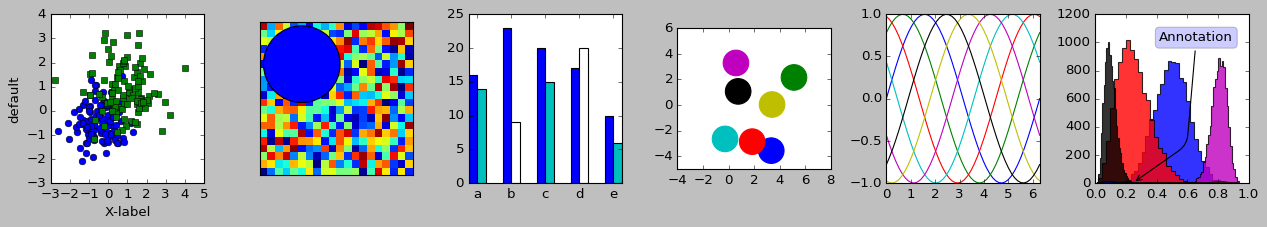

With style: classic


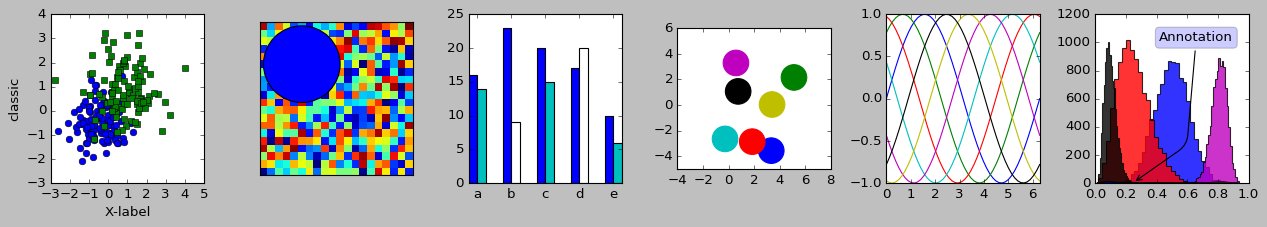

With style: bmh


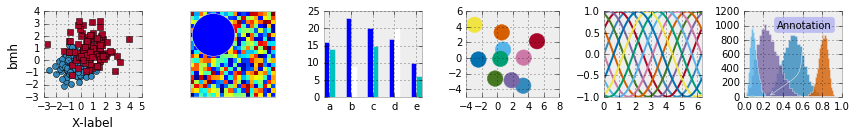

With style: dark_background


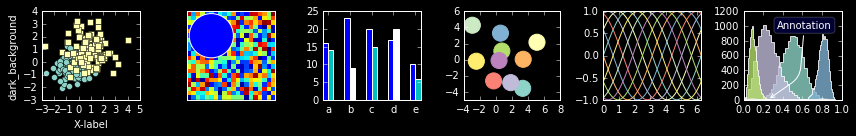

With style: fivethirtyeight


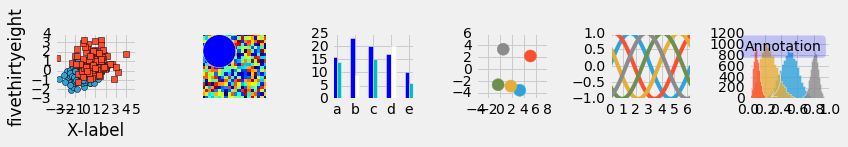

With style: ggplot


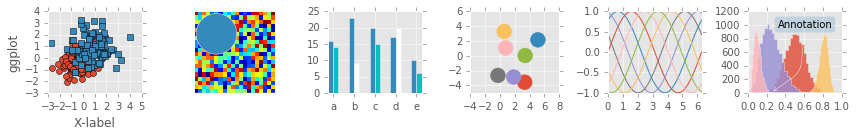

With style: grayscale


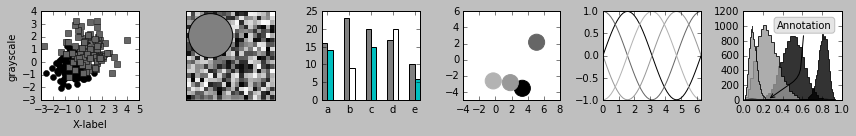

With style: seaborn-bright


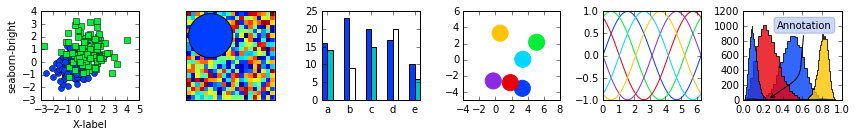

With style: seaborn-colorblind


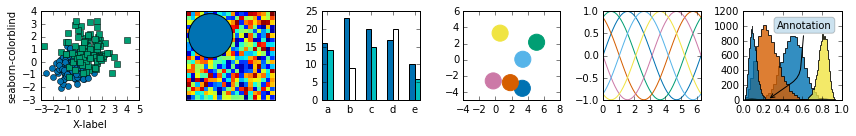

With style: seaborn-dark


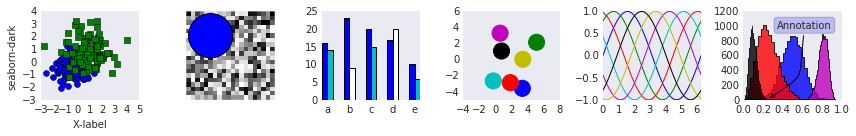

With style: seaborn-dark-palette


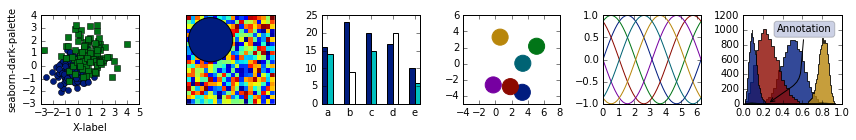

With style: seaborn-darkgrid


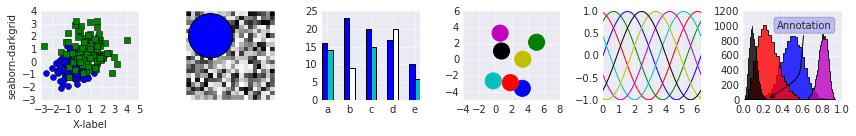

With style: seaborn-deep


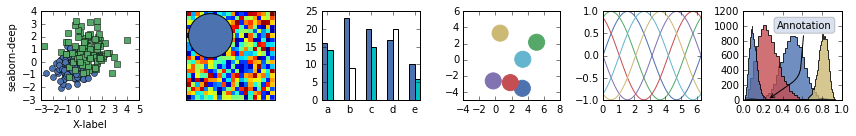

With style: seaborn-muted


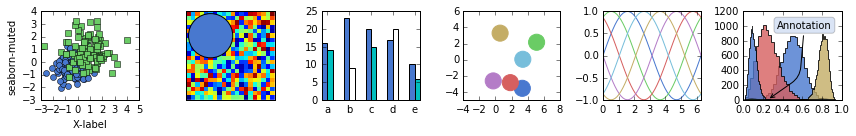

With style: seaborn-notebook


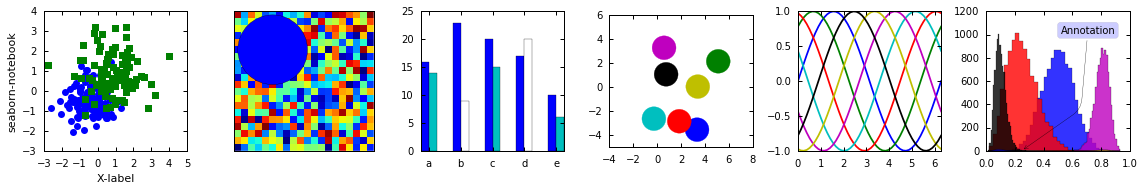

With style: seaborn-paper


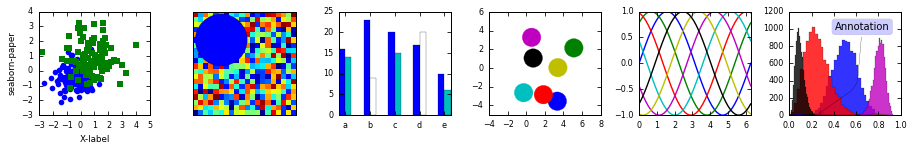

With style: seaborn-pastel


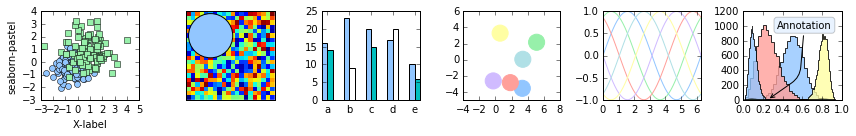

With style: seaborn-poster


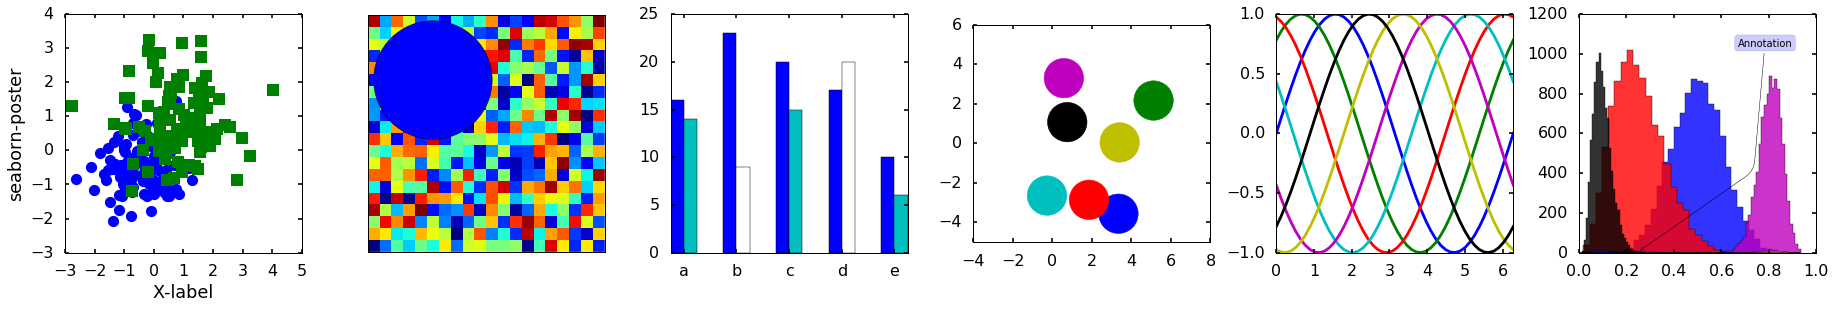

With style: seaborn-talk


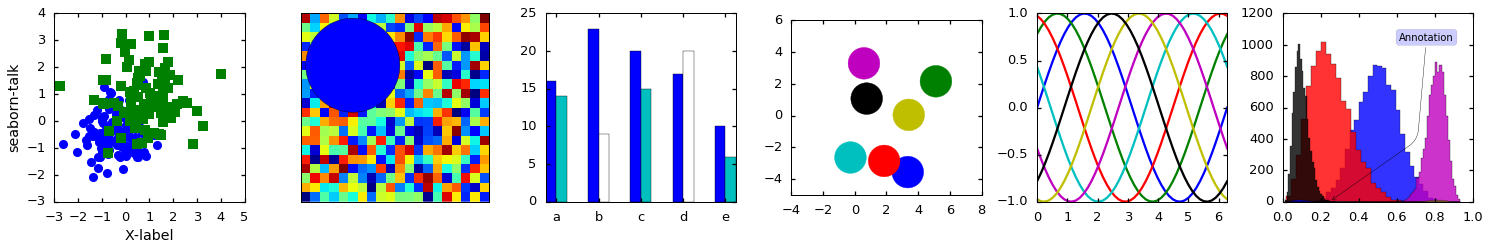

With style: seaborn-ticks


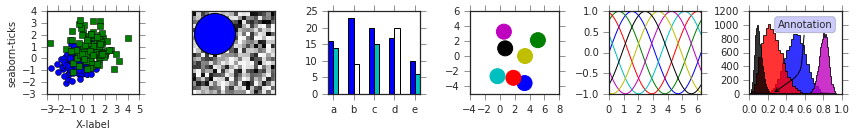

With style: seaborn-white


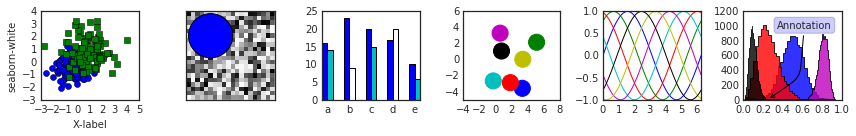

With style: seaborn-whitegrid


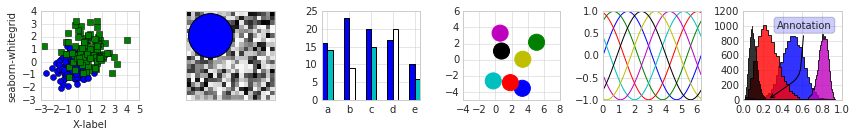

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot.
    """
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle.
    """
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), '-')
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels.
    """
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    try:
      ax.bar(x + width, yb, width, color='C2')
    except ValueError:
      # ValueError: to_rgba: Invalid rgba arg "2"
      # to_rgb: Invalid rgb arg "2"
      # gray (string) must be in range 0-1
      ax.bar(x + width, yb, width, color='C1')
      
    ax.set_xticks(x + width)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch.
    """
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation.
    """
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        try:
          ax.hist(values, histtype="stepfilled", bins=30,
                  alpha=0.8, density=True)
        except AttributeError:
          # AttributeError: Unknown property density
          ax.hist(values, histtype="stepfilled", bins=30,
                  alpha=0.8, normed=True)
          
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25), xycoords='data',
                xytext=(0.9, 0.9), textcoords='axes fraction',
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style.
    """
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams['figure.figsize']
    fig_size = [fig_width * 2, fig_height / 2]

    fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
                             figsize=fig_size, squeeze=True)
    axes[0].set_ylabel(style_label)

    plot_scatter(axes[0], prng)
    plot_image_and_patch(axes[1], prng)
    plot_bar_graphs(axes[2], prng)
    plot_colored_circles(axes[3], prng)
    plot_colored_sinusoidal_lines(axes[4])
    plot_histograms(axes[5], prng)

    fig.tight_layout()

    return fig


if __name__ == "__main__":

    # Setup a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available if style != 'classic')

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        print('With style: {0}'.format(style_label))
        with plt.style.context(style_label):
            fig = plot_figure(style_label=style_label)
            plt.show()

    #plt.show()

With style: tdrstyle.mplstyle


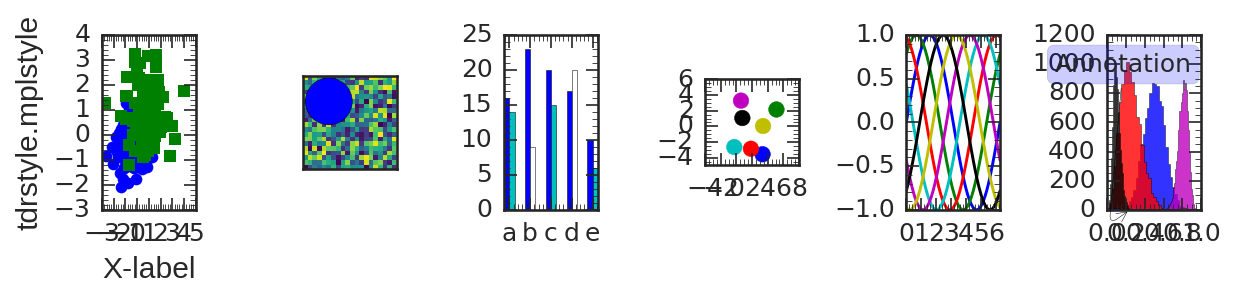

In [5]:
style_label = 'tdrstyle.mplstyle'
print('With style: {0}'.format(style_label))
with plt.style.context(style_label):
    fig = plot_figure(style_label=style_label)
    plt.show()

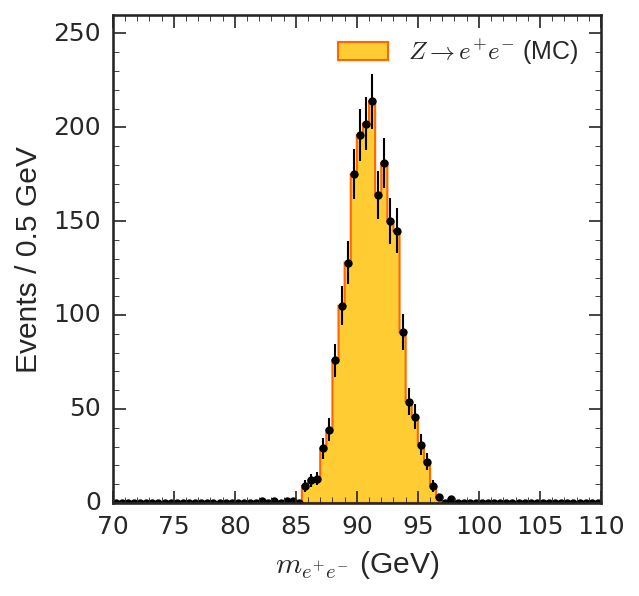

In [6]:
prng = np.random.RandomState(96917002)
data = prng.normal(loc=91.1876, scale=2, size=2100)

with plt.style.context(style_label):
  
  # Plot histogram
  hist, edges, patches = plt.hist(data, bins=80, range=(70,110), histtype='stepfilled', facecolor='#FFCC33', edgecolor='#FF6600', linewidth=1)
  labels = [r'$Z \rightarrow e^{+}e^{-}$ (MC)']
  plt.legend(labels)
  plt.xlabel(r'$m_{e^{+}e^{-}}$ (GeV)')
  plt.ylabel(r'Events / 0.5 GeV')
  plt.ylim(0,260)
  
  # Plot error bar
  xdata = (edges[1:] + edges[:-1])/2
  ydata = hist
  wdata = np.ones_like(ydata)
  sumw2 = ydata * np.square(wdata)
  xerr = (edges[1:] - edges[:-1])/2
  yerr = np.sqrt(sumw2)
  yerr_upper = yerr
  yerr_lower = yerr
  plt.errorbar(xdata, ydata, xerr=xerr, yerr=[yerr_lower, yerr_upper], color='black', ecolor='black', elinewidth=1, markersize=8, fmt='.')
  
  plt.show()

In [7]:
use_root = True

In [8]:
if use_root:
  import ROOT
  from rootpy.plotting import Hist, Efficiency
  import root_numpy
  
  ROOT.gROOT.LoadMacro("../test5/tdrstyle.C")
  ROOT.gROOT.ProcessLine("setTDRStyle();")
  ROOT.gStyle.SetPalette(57)  # kBird
  ROOT.gStyle.SetMarkerStyle(1)
  ROOT.gStyle.SetEndErrorSize(0)
  ROOT.gStyle.SetPadGridX(True)
  ROOT.gStyle.SetPadGridY(True)
  
  infile1 = ROOT.TFile.Open('../test5/emtf_eff_vs_genpt_l1pt20.root')
  h_eff = infile1.Get('emtf_eff_vs_genpt_l1pt20_denom_clone')
  h_eff = Efficiency(h_eff.GetPassedHistogram(), h_eff.GetTotalHistogram())
  h_eff.SetStatisticOption(0)  # kFCP
  h_eff.SetConfidenceLevel(0.682689492137)  # one sigma
  h_eff.SetMarkerStyle(1)
  h_eff.SetMarkerColor(632)  # kRed
  h_eff.SetLineColor(632)  # kRed
  h_eff.SetLineWidth(2)
  h_eff.SetDirectory(0)

Welcome to JupyROOT 6.10/09


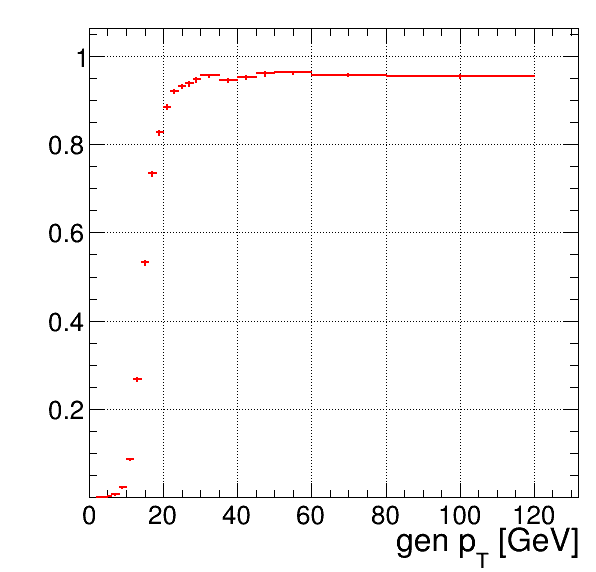

In [9]:
if use_root:
  c = ROOT.TCanvas()
  h_eff.Draw()
  c.Draw()

In [26]:
if use_root:
  from scipy.stats import beta
  
  def find_errors_as_TEfficiency_kFCP(total_array, passed_array, level):
    """Copied from ROOT TEfficiency::ClopperPearson()
    """
    alpha = (1.0 - level) / 2
    lower_array = np.zeros_like(total_array)
    upper_array = np.zeros_like(total_array)
    
    for i, (total, passed) in enumerate(zip(total_array, passed_array)):
      if total == 0.:
        eff = 0.
      else:
        eff = np.true_divide(passed, total)
      if passed == 0.:
        l = 0.0
      else:
        l = beta.ppf(alpha, passed, total-passed+1)
      if passed == total:
        u = 1.0
      else:
        u = beta.ppf(1 - alpha, passed+1, total-passed)
      lower_array[i] = eff - l
      upper_array[i] = u - eff
    return np.vstack((lower_array, upper_array))

  
  passed, edges = root_numpy.hist2array(h_eff.GetPassedHistogram(), include_overflow=False, return_edges=True)
  total, edges = root_numpy.hist2array(h_eff.GetTotalHistogram(), include_overflow=False, return_edges=True)
  eff = passed/total
  edges = edges[0]
  errors = np.asarray(list(h_eff.errors()))
  errors = errors.transpose()
  print eff, edges, errors
  
  xdata = (edges[1:] + edges[:-1])/2
  ydata = eff
  xerr = (edges[1:] - edges[:-1])/2
  #yerr = np.zeros_like(ydata)
  yerr = find_errors_as_TEfficiency_kFCP(total, passed, level = 0.682689492137)
  print yerr

[          nan           nan           nan 6.7354180e-05 3.4482760e-04
 8.4893883e-04 1.8917896e-03 6.3663665e-03 2.2341331e-02 8.5534036e-02
 2.6731095e-01 5.3188485e-01 7.3400432e-01 8.2694489e-01 8.8529491e-01
 9.2100894e-01 9.3172061e-01 9.3761551e-01 9.4662309e-01 9.5675677e-01
 9.4597536e-01 9.5185995e-01 9.6044570e-01 9.6268654e-01 9.5723015e-01
 9.5428401e-01] [  0.    0.5   1.    2.    3.    4.    5.    6.    8.   10.   12.   14.
  16.   18.   20.   22.   24.   26.   28.   30.   35.   40.   45.   50.
  60.   80.  120. ] [[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.20279370e-05
  7.13673519e-05 1.44829899e-04 2.66455543e-04 4.35690566e-04
  1.04670975e-03 2.40122286e-03 4.58863640e-03 6.00150777e-03
  6.05580447e-03 5.88586087e-03 5.49703416e-03 5.22466706e-03
  5.35304406e-03 5.64254988e-03 5.77632561e-03 3.51520434e-03
  4.65560734e-03 4.90614477e-03 5.15429610e-03 4.03100005e-03
  3.73659517e-03 3.93004189e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 3.07584268e-0

/cvmfs/cms.cern.ch/slc6_amd64_gcc630/external/py2-pippkgs/6.0-omkpbe5/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in divide


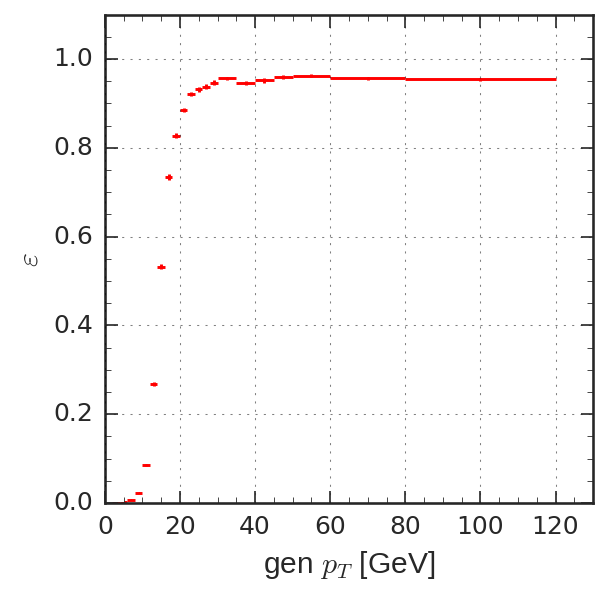

In [28]:
with plt.style.context(style_label):
    fig, ax = plt.subplots()
    with mpl.rc_context(rc={}):  #'lines.dotted_pattern' : [1, 3]
      ax.grid(1)
    ax.errorbar(xdata, ydata, xerr=xerr, yerr=yerr, color='r', marker=',', fmt='o', lw=1)
    ax.set_xlabel(r'gen $p_{T}$ [GeV]')
    ax.set_ylabel(r'$\varepsilon$')
    ax.set_xlim(0,130)
    ax.set_ylim(0,1.1)
    plt.show()

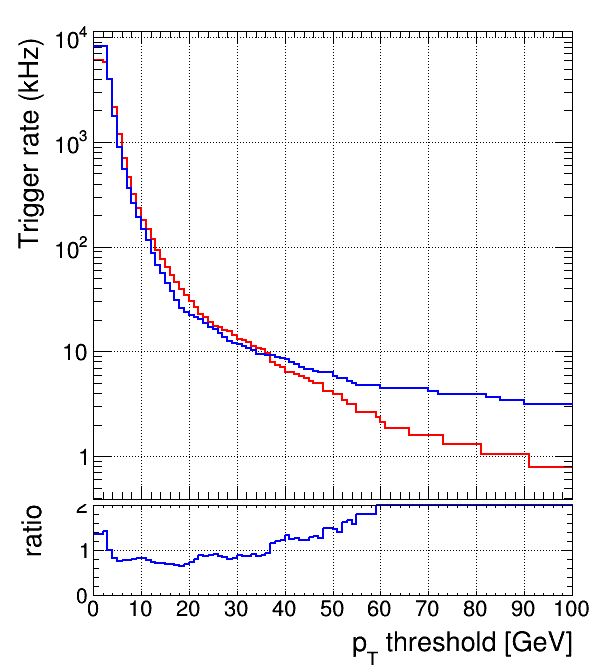

In [31]:
if use_root:
  infile2 = ROOT.TFile.Open('../test5/emtf2023_rate_reduction.root')
  denom = infile2.Get('denom')
  numer = infile2.Get('numer')
  ratio = infile2.Get('ratio')
  
  cc1 = ROOT.TCanvas("cc1", "cc1", 600, 700)
  cc1.Divide(1,2)
  cc1_1 = cc1.GetPad(1)
  cc1_1.SetPad(0.01,0.25,0.99,0.99)
  cc1_1.SetBottomMargin(0.01)
  cc1_1.SetGrid()
  cc1_1.SetLogy()
  cc1_2 = cc1.GetPad(2)
  cc1_2.SetPad(0.01,0.01,0.99,0.25)
  cc1_2.SetTopMargin(0.01)
  cc1_2.SetBottomMargin(0.43)
  cc1_2.SetGrid()

  cc1_1.cd()
  denom.Draw("hist")
  numer.Draw("hist same")
  cc1_2.cd()
  ratio.Draw("hist same")
  cc1.Draw()